# Multiprocessing

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [2]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Multiprocessing is the utilization of two or more central processing units (CPUs) in a single computer system. 

Its definition can vary depending on the context, but generally it refers to a system's ability to support multiple CPUs and its capacity to distribute work among them.

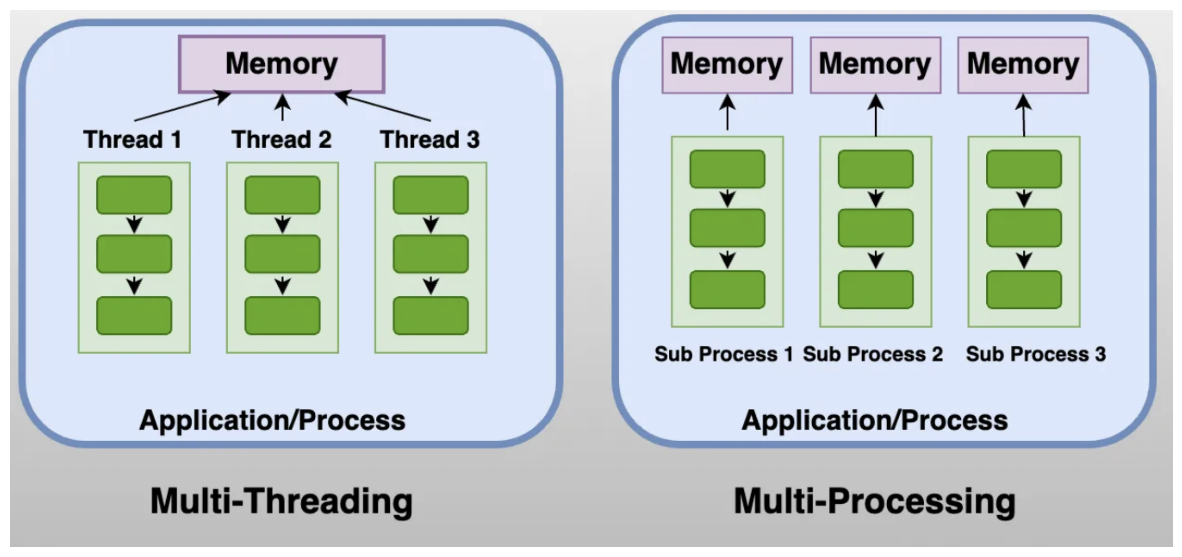

In [3]:
display_img('Multiprocessing.png', 15, 10)

# 1. Comparison

In [4]:
import time
from fibonacci import *

In [5]:
def time_to_str(start, end):
    
    delta = (end - start)

    hour = int(delta/3600)
    minu = int((delta - hour*3600)/60)
    segu = int(delta - hour*3600 - minu*60)
    
    str_time = f'It takes {hour} hours, {minu} minutes and {segu} seconds'
    
    return str_time

In [6]:
v_0 = 35
values = [(v_0 + i) for i in range(8)]

# 2. For cycle

In [7]:
start_c = time.time()

for v in values:
    
    start_v = time.time()

    print('Value:', v)
    
    fibonacci(v)

    end_v = time.time()
    print(time_to_str(start_v, end_v))

    print('-'*70)

end_c = time.time()
print('\n')
print('Total time:', time_to_str(start_c, end_c))

Value: 35
It takes 0 hours, 0 minutes and 2 seconds
----------------------------------------------------------------------
Value: 36
It takes 0 hours, 0 minutes and 3 seconds
----------------------------------------------------------------------
Value: 37
It takes 0 hours, 0 minutes and 6 seconds
----------------------------------------------------------------------
Value: 38
It takes 0 hours, 0 minutes and 10 seconds
----------------------------------------------------------------------
Value: 39
It takes 0 hours, 0 minutes and 16 seconds
----------------------------------------------------------------------
Value: 40
It takes 0 hours, 0 minutes and 27 seconds
----------------------------------------------------------------------
Value: 41
It takes 0 hours, 0 minutes and 43 seconds
----------------------------------------------------------------------
Value: 42
It takes 0 hours, 1 minutes and 8 seconds
----------------------------------------------------------------------


Total time

# 3. Multiprocessing

In [8]:
import multiprocessing
from multiprocessing import Process

In [9]:
total_number_of_processes = multiprocessing.cpu_count()

In [10]:
print(total_number_of_processes)

8


In [11]:
start_m = time.time()

#----------------------------------------------------------------------

list_process = []

for v in values:

    print('Value:', v)
        
    pro = Process(target = fibonacci, args=(v,))

    list_process.append(pro)
    list_process[-1].start()

    if(len(list_process) >= total_number_of_processes):

        list_process[0].join()
        list_process = list_process[1:]

for pro in list_process:
    pro.join()

#----------------------------------------------------------------------

end_m = time.time()
print('\n')
print('Total time:', time_to_str(start_m, end_m))

Value: 35
Value: 36
Value: 37
Value: 38
Value: 39
Value: 40
Value: 41
Value: 42


Total time: It takes 0 hours, 1 minutes and 24 seconds


### Comments:

As you can see with multiprocessing it takes less time and it takes only the time it takes the bigger iteration.